In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
############# THINGS TO MODIFY

# Read into pandas DataFrames
datapath="/Users/zanejobe/Dropbox/_CoRE/Rosie_Zane_working/Seaborn/"
filename="PLDataLOGGED_TH_TR_GS_FR_ElementNum"

# specify export file name
figname="PL_TH_TR_Data"


In [3]:
# import data
df = pd.read_csv(datapath + filename + '.txt', header=None, sep='  ', names=['th', 'tr', 'gs', 'fr', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


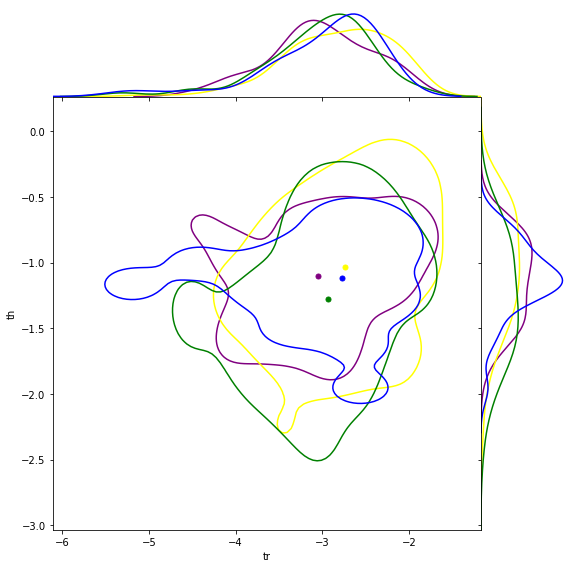

In [8]:
# thinning rate is x axis
# thickness is y axis

g = sns.JointGrid("tr", "th", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    

    
    ncolor+=1
    

plt.savefig(figname + ".pdf", transparent=True)
